In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data=sio.loadmat('PA2-cluster-data/cluster_data.mat')

In [3]:
print data

{'dataC_Y': array([[1, 4, 4, 4, 4, 4, 4, 1, 2, 4, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 4, 3,
        4, 2, 4, 1, 4, 4, 4, 4, 1, 1, 4, 4, 4, 1, 4, 1, 1, 3, 4, 1, 1, 1,
        1, 3, 4, 2, 1, 4, 3, 1, 2, 2, 1, 4, 4, 1, 1, 4, 4, 4, 4, 2, 4, 1,
        4, 4, 4, 1, 4, 1, 1, 1, 1, 4, 2, 4, 2, 4, 1, 4, 1, 4, 4, 3, 1, 2,
        2, 1, 1, 4, 1, 2, 2, 4, 4, 1, 1, 1, 1, 4, 1, 2, 3, 3, 3, 4, 3, 4,
        4, 1, 1, 3, 3, 1, 2, 4, 1, 2, 1, 1, 4, 4, 1, 1, 4, 4, 2, 3, 4, 4,
        1, 2, 1, 2, 1, 3, 2, 3, 4, 4, 4, 1, 1, 3, 4, 1, 1, 1, 2, 4, 2, 4,
        4, 4, 3, 1, 4, 3, 4, 4, 1, 1, 4, 4, 1, 1, 1, 1, 4, 1, 4, 1, 4, 4,
        1, 1, 4, 4, 1, 1, 4, 3, 4, 1, 4, 3, 4, 1, 4, 3, 4, 1, 4, 2, 4, 4,
        2, 4]], dtype=uint8), 'dataC_X': array([[-1.29896126e+01,  1.07840066e+01,  1.19542865e+01,
         1.23598497e+01,  9.59577133e+00,  1.02947236e+01,
         1.11886440e+01, -1.17919224e+01, -3.29957136e+00,
         1.27226643e+01,  1.02948530e+01,  9.10184621e+00,
        -8.75847909e+00, -1.38616331e+01,  1.

In [4]:
dataA_X=data['dataA_X']
dataA_Y=data['dataA_Y']
dataB_X=data['dataB_X']
dataB_Y=data['dataB_Y']
dataC_X=data['dataC_X']
dataC_Y=data['dataC_Y']

In [5]:
print dataA_X.shape
print dataA_Y.shape
print dataB_X.shape
print dataB_Y.shape
print dataC_X.shape
print dataC_Y.shape
print 199
print dataA_X.shape[1]

temptest=np.mat(dataA_X).A
print type(temptest)
print type(dataA_X)
sigma=np.zeros((4, 2, 2))
print sigma

(2, 200)
(1, 200)
(2, 200)
(1, 200)
(2, 200)
(1, 200)
199
200
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


(4, 2) (200, 2)


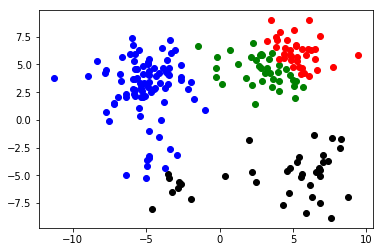

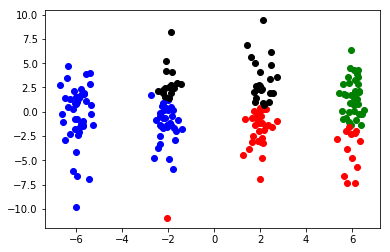

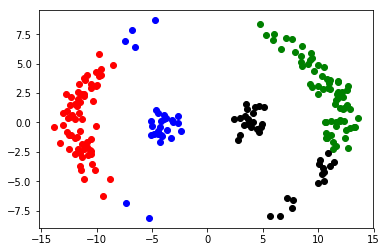

In [7]:
##K-means
def distance(x,mju):
    return np.sum(np.power((x-mju),2))

def init_centroid(x,k):#when implement use x.T
    n,dim=x.shape
    centroid=np.zeros((k,dim))
    for i in range(k):
        index=int(np.random.uniform(0,n))
        centroid[i,:]=x[index,:]
    return centroid

def kmeans(x,k):
    n=x.shape[0]
    cluster=np.zeros((n,2))
    cluster_change=True
    
    #init centriod
    centroid=init_centroid(x,k)
    
    while cluster_change:
        cluster_change=False
        for i in range(n):
            mindist=10000
            minindex=0
            #find the closet point
            for j in range(k):
                dist=distance(centroid[j,:],x[i,:])
                if dist<mindist:
                    mindist=dist
                    minindex=j
                    
                #update its cluster
            if cluster[i,0]!=minindex:
                cluster_change=True
                cluster[i,:]=minindex,np.power(mindist,2)
            #update centroid        
        for j in range(k):
            point=x[np.nonzero(cluster[:,0]==j)[0]]
            if len(point)!=0:
                centroid[j,:]=np.mean(point,axis=0)#new_cents[cent_i, :] = np.mean(k_cluster, 0)  
    return centroid,cluster
    
def plot_kmeans(x,k,centroid,cluster):
    n,dim=x.shape
    mark = ['or','ob','og','ok']
    for i in range(n):
        markindex=int(cluster[i,0])
        plt.plot(x[i,0],x[i,1],mark[markindex])
        
    plt.show()
    
centroid,cluster=kmeans(dataA_X.T,k=4)
print centroid.shape,cluster.shape
plot_kmeans(dataA_X.T,4,centroid,cluster)
centroid,cluster=kmeans(dataB_X.T,k=4)
plot_kmeans(dataB_X.T,4,centroid,cluster)
centroid,cluster=kmeans(dataC_X.T,k=4)
plot_kmeans(dataC_X.T,4,centroid,cluster)

(array([[ 5.78986288, -4.7797623 ],
       [-4.91420697,  3.74485105],
       [-3.93629543, -4.54851802],
       [ 4.30537635,  5.27839729]]), array([[[ 3.87950123,  0.18972201],
        [ 0.18972201,  3.9375575 ]],

       [[ 3.68991297,  0.42499878],
        [ 0.42499878,  2.75169081]],

       [[ 1.20601042, -0.63476749],
        [-0.63476749,  3.35030653]],

       [[ 2.75690208,  0.36784447],
        [ 0.36784447,  2.41942774]]]), array([0.14502324, 0.40748378, 0.09527197, 0.35222101]))
(4, 2) (4, 2, 2) (4,)
(200, 4)


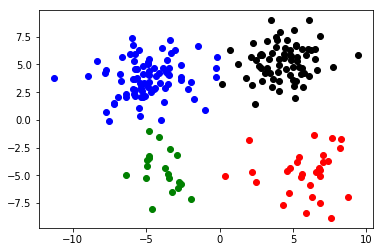

(array([[-5.94077293, -0.26851514],
       [ 2.01972626,  0.47711501],
       [ 6.02080912,  0.12757884],
       [-2.05083335, -0.0707839 ]]), array([[[ 1.28178959e-01, -6.41321366e-03],
        [-6.41321366e-03,  8.95439536e+00]],

       [[ 1.01566683e-01,  1.59836189e-01],
        [ 1.59836189e-01,  9.64264004e+00]],

       [[ 7.28413725e-02,  9.76397555e-02],
        [ 9.76397555e-02,  9.32683898e+00]],

       [[ 8.27613849e-02,  9.73285523e-02],
        [ 9.73285523e-02,  9.10213635e+00]]]), array([0.22 , 0.27 , 0.255, 0.255]))
(4, 2) (4, 2, 2) (4,)
(200, 4)


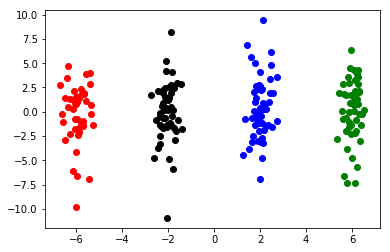

(array([[ 11.17147894,  -0.49954065],
       [ -3.98434417,  -0.30350485],
       [-10.98508665,   0.6156588 ],
       [  5.75336339,   2.5955651 ]]), array([[[ 2.4076207 ,  3.19554076],
        [ 3.19554076,  9.68692739]],

       [[ 0.59390666,  0.07286836],
        [ 0.07286836,  0.54748651]],

       [[ 2.47957743,  2.25656369],
        [ 2.25656369, 10.2698855 ]],

       [[13.25784865, 10.0419679 ],
        [10.0419679 , 12.7456584 ]]]), array([0.3084066 , 0.11437629, 0.35047329, 0.22674382]))
(4, 2) (4, 2, 2) (4,)
(200, 4)


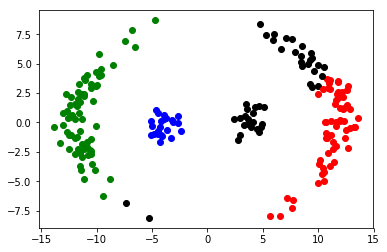

In [10]:
##EM-GMM
from scipy.stats import multivariate_normal


def Estep(X,prior,mu,sigma):
    D,N=X.shape
    K=len(prior)
    Z=np.zeros((N,K))
    for i in range(0,N):
        Z_sum=0
        for k in range(0, K):
            Z_temp=multivariate_normal.pdf(X[:, i], mu[k,:], sigma[k,:,:])
            Z_sum+=prior[k] * Z_temp
        for k in range(0,K):
            Z[i, k]=prior[k] * multivariate_normal.pdf(X[:, i], mu[k,:], sigma[k,:,:]) / Z_sum
    return Z
def Mstep(X,Z,K):
    D,N=X.shape
    mu=np.zeros((K,D))
    sigma=np.zeros((K,D,D))
    prior=np.zeros(K)
    for k in range(0,K):
        N_k = np.sum(Z,0)[k]
        for i in range(0,N):
            mu[k]+=Z[i,k]*X[:,i]
        mu[k]/= N_k
        for i in range(0, N):
            sigma[k]+=Z[i,k]*np.dot((X[:,i] - mu[k]).reshape(2,1), (X[:,i] - mu[k]).reshape(1,2))
            #need reshape that is where I made mistake
        sigma[k]/=N_k
        prior[k]=N_k/N
    return mu, sigma, prior  
def EM(X,K):
    D, N=X.shape
    mu=np.random.randn(K, D)
    sigma=np.zeros((K, D, D))
    for i in range(K):
        sigma[i]=np.eye(D)
    prior = np.ones(K) / K
    while (True):
        temp_sigma=sigma.copy()
        Z = Estep(X, prior, mu, sigma)
        mu, sigma, prior = Mstep(X, Z,K)
        if (abs(sigma-temp_sigma)<1e-7).all():
            break
    print(mu,sigma,prior)
    print mu.shape,sigma.shape,prior.shape
    print Z.shape
    cluster=np.zeros((1,N))
    for i in range(N):
        minem=0
        for j in range(K):
            if(Z[i][j]>minem):
                cluster[0][i]=j
                minem=Z[i][j]
    return cluster
def plot_em(x,cluster,k):
    dim,n=x.shape
    mark = ['or','ob','og','ok']
    for i in range(n):
        markindex=int(cluster[0,i])
        plt.plot(x[0,i],x[1,i],mark[markindex])
         
    plt.show()
clusterA=EM(dataA_X,4)
plot_em(dataA_X,clusterA,4)

clusterB=EM(dataB_X,4)
plot_em(dataB_X,clusterB,4)

clusterC=EM(dataC_X,4)
plot_em(dataC_X,clusterC,4)

[ 0.  1.  2.  3.  4.  4.  1.  5.  1.  3.  6.  3.  7.  8.  4.  9.  4.  1.
 10. 11.  1. 12.  3.  1.  4.  1.  4.  3.  4.  4. 13.  1.  4.  1.  4. 14.
  3.  1. 15.  1.  1. 16. 11.  1.  1.  1.  3.  1. 13.  4.  1.  7. 17.  1.
  1.  4.  4.  1.  1.  4.  4. 17. 18.  1.  3. 15. 17.  4.  3. 19. 20. 21.
 11.  1. 14. 20.  1. 20.  1.  1.  1. 20.  1.  1.  3.  1. 22.  1.  1. 23.
  9. 22.  7.  1.  1.  4.  4.  7. 19. 24. 11.  3. 21.  1.  1.  1.  1.  1.
  1. 17. 17. 25. 26.  1.  1. 11.  1.  3.  1.  1. 12. 13. 20.  1.  7. 19.
 20. 20. 27. 28. 20. 27. 13.  1. 13.  1.  1.  1.  1.  1. 20.  4.  3.  1.
 22.  1.  4. 11.  1. 19.  1. 20.  1. 20.  1.  4. 22.  7.  3.  1. 20.  4.
 14. 11. 20. 20. 19. 10. 29. 13. 20.  1.  4. 11. 20.  3. 13.  1.  3.  3.
 19.  1.  3.  1. 20. 10.  3.  0.  4.  0. 20.  1. 20. 14.  4.  1. 20. 20.
  1.  1.]


IndexError: list index out of range

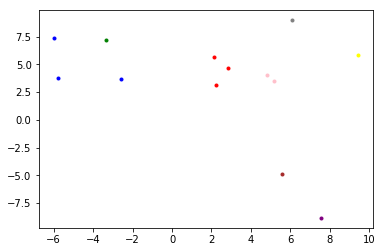

In [97]:
#meanshift

def distance(x,mju):
    return np.sum(np.power((x-mju),2))

def Neighborpoint(x,data,h):
    Neighborpoint=[]
    data.shape[1]
    for i in range(data[1].shape):
        dist=distance(x,data[:,i])
        if dist<h:
            Neighborpoint.append(data[:,i].tolist())
    Neighborpoint=np.array(Neighborpoint).T
    return Neighborpoint

def multivariate_gaussian_kernel(distances, bandwidths):
    dim = len(bandwidths)
    cov = np.multiply(np.power(bandwidths, 2), np.eye(dim))
    # Compute Multivariate gaussian (vectorized implementation)
    exponent = -0.5 * np.sum(np.multiply(np.dot(distances, np.linalg.inv(cov)), distances), axis=1)
    val = (1/np.power((2*np.pi), (dim/2)) * np.power(np.linalg.det(cov), 0.5)) * np.exp(exponent)

    return val

def mean_shift(x, h, x_init, ct):
    num_data = x.shape[1]
    dim_param = x.shape[0]
    x_err = math.inf

    x_curr = np.copy(x_init)
    print('before updating: ', x_curr)

    while x_err > ct:

        # find neighbor points
        x_nbr = neighbourhood_points(x_curr, x, h)

        num_nbr = x_nbr.shape[1]
        print('# neighbors: ', num_nbr)

        x_expectation = np.zeros(dim_param)

        den = 0
        for i in range(num_nbr):
            cov = h * h * np.identity(dim_param)
            cov[2, 2] = 10 * h * h
            cov[3, 3] = 10 * h * h
            x_expectation += x_nbr[:, i] * multivariate_normal.pdf(x_nbr[:, i], x_curr, cov)
            den += multivariate_normal.pdf(x_nbr[:, i], x_curr, cov)
            # x_expectation += x_nbr[:, i] * multivariate_normal.pdf(x_nbr[:, i], x_curr, h * h * np.identity(dim_param))
            # den += multivariate_normal.pdf(x_nbr[:, i], x_curr, h * h * np.identity(dim_param))

        x_next = x_expectation / den

        x_err = np.linalg.norm(x_curr - x_next)

        x_curr = x_next

    print('after updating: ', x_curr)

    return x_curr


def mean_shift_clustering(x, h, ct, pr_min):

    num_data = x.shape[1]

    x_cnvg = np.ndarray(x.shape)

    peaks = []
    z = np.ndarray(num_data)

    for i in range(num_data):
        print(i)

        x_cnvg[:, i] = mean_shift(x, h, x[:, i], ct)

        if len(peaks) == 0:
            peaks.append(x_cnvg[:, i])
            z[i] = 0

        else:
            dists = np.array([np.linalg.norm(p_v - x_cnvg[:, i]) for p_v in peaks])
            if np.min(dists) < pr_min:
                z[i] = np.argmin(dists)
            else:
                peaks.append(x_cnvg[:, i])
                z[i] = len(peaks) - 1

    # print(x_cnvg)

    return x_cnvg, peaks, z

    


[0 0 1 1 1 1 0 2 0 1 1 1 2 3 1 2 1 0 2 2 0 0 1 0 1 0 1 1 1 1 3 0 1 0 1 2 1
 0 2 0 0 3 2 0 0 0 1 0 3 1 0 2 1 0 0 1 1 0 0 1 1 1 1 0 1 2 0 1 1 3 1 3 2 0
 2 1 0 1 0 0 0 1 0 0 1 0 0 0 0 2 2 0 2 0 0 1 1 2 3 2 2 1 3 0 0 0 0 0 0 1 1
 0 3 0 0 2 0 1 0 0 3 3 1 0 2 3 1 1 0 0 1 0 3 0 3 0 0 0 0 0 1 1 1 0 0 0 1 2
 0 3 0 1 0 1 0 1 0 2 1 0 1 1 2 2 1 1 3 2 3 3 1 0 1 2 1 1 3 0 1 1 3 0 1 0 1
 2 1 0 1 0 1 0 1 2 1 0 1 1 0 0]
or


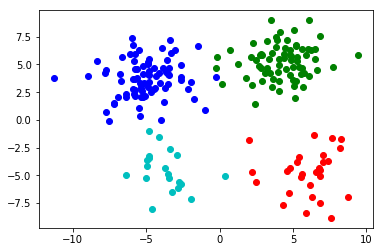

[0 2 2 2 1 1 2 3 0 1 1 2 3 4 5 3 1 0 3 3 5 5 1 0 1 0 2 1 2 1 3 0 1 2 2 4 2
 0 3 2 2 3 4 0 0 6 1 0 0 1 2 3 0 0 0 1 2 0 0 1 1 2 1 0 1 3 1 1 1 3 1 0 4 0
 3 1 0 1 0 2 4 1 0 2 1 2 5 0 0 3 4 2 3 0 0 2 1 3 3 3 3 2 3 0 2 2 2 2 2 1 1
 0 3 2 2 3 0 2 0 0 3 3 1 5 3 0 1 1 0 2 1 2 3 0 3 5 4 2 0 2 1 1 2 0 4 2 1 3
 0 3 0 1 0 1 2 2 2 3 1 2 2 1 3 3 2 2 3 3 3 3 1 0 1 3 1 1 4 0 2 1 3 0 1 2 2
 4 1 2 1 0 1 2 1 3 1 6 1 2 0 2]
or


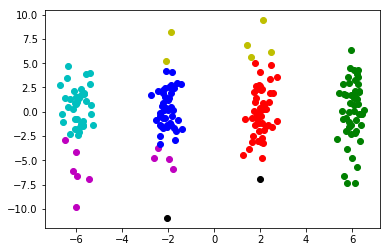

[1 0 0 0 0 4 0 1 2 0 0 0 6 1 0 5 0 1 1 1 3 3 3 2 0 1 0 0 0 0 6 6 0 0 0 1 4
 5 5 3 0 1 1 1 1 3 0 2 1 0 3 1 2 2 1 4 0 1 1 0 0 0 0 2 0 1 0 3 0 1 0 1 1 1
 1 0 2 0 2 0 1 0 1 0 0 3 1 2 2 1 1 0 1 2 2 0 0 1 1 5 1 0 1 2 3 3 3 0 3 4 4
 1 5 3 3 6 2 0 1 2 1 1 0 0 1 1 4 0 2 3 0 0 1 2 1 2 5 3 2 3 0 0 0 1 1 3 0 5
 1 1 2 3 2 4 0 4 3 1 3 3 0 0 1 1 0 0 1 5 1 1 4 1 0 1 0 0 6 5 0 0 6 1 0 3 4
 1 0 3 4 5 0 3 0 1 0 2 0 0 2 0]
or


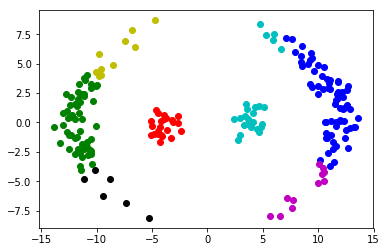

In [17]:
from sklearn.cluster import MeanShift
def meanshift(x,bandwidth):
    
    clf_ms=MeanShift(bandwidth)
    ms=clf_ms.fit_predict(x.T)
    print ms
    colors = ['ob','og','or','oc','om','oy','ok','ow']
    print colors[2]
    for i in range(200):
        plt.plot(x[0,i],x[1,i],colors[ms[i]])
    plt.show()
meanshift(dataA_X,3)
meanshift(dataB_X,3)
meanshift(dataC_X,3)
def mean_shift(x,bandwidth):
    
    clf_ms=MeanShift(bandwidth)
    ms=clf_ms.fit_predict(x.T)
    return ms


[122 122 122 ...  21  21  21]
[123 123 123 ...  22  22  22]


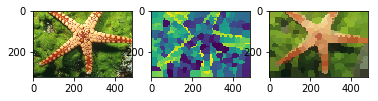

[2 2 2 ... 1 1 1]


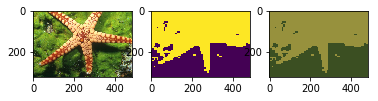

In [60]:
"""
Helper functions for programming assignment 2
"""
import numpy as np
import numpy as np
import pylab as pl
from PIL import Image
import scipy.io as sio
def rgb2ycbcr(img):
    """
    It should work the same as Matlab's version
    img should be np.ndarray with dtype = uint8
    value range(img) = [0,255]
    """
    oriT = np.asarray([65.481, 128.553, 24.966, \
            -37.797, -74.203, 112, \
            112, -93.786, -18.214]).reshape((3,3),order='C')/255
    offset = [16, 128, 128]
    img = np.minimum(img, 255)
    resimg = np.zeros(img.shape,dtype=np.float64)
    for i in range(3):
        resimg[:,:,i] = img[:,:,0] * oriT[i,0] + img[:,:,1] * oriT[i,1] + \
          img[:,:,2] * oriT[i,2] + offset[i]
    resimg = np.round(resimg)
    return np.require(resimg,dtype=np.uint8)
   
def colorsegms(segm, img):
    """
    colorsegm - color a segmentation based on the image
    csegm = colorsegm(segm, img)
    segm = the segmentation image  [type = np.ndarray]
    img = the original image    [type = np.ndarray (or Image)]
    csegm = the colored segmentation -- each segment is colored based on the 
            average pixel color within the segment.
    """
    img = np.asarray(img).copy()
    if segm.shape[0:2] != img.shape[0:2]:
        raise Exception('The shape of segmentation and image are not consistent') 
    rimg, gimg, bimg = img[:,:,0], img[:,:,1], img[:,:,2]
    for i in range(1, np.int(max(segm.flatten())) + 1):
        # assume label starts from 1
        ind = (segm == i)
        rimg[ind] = np.mean(rimg[ind].flatten())
        gimg[ind] = np.mean(gimg[ind].flatten())
        bimg[ind] = np.mean(bimg[ind].flatten())
    return img

def getfeatures(img, stepsize, follow_matlab = True):
    """
    getfeatures - extract features from an image
     [X, L] = getfeatures(img, stepsize)
     INPUT
     img      - the image   [type = np.ndarray or Image]
     stepsize - window stepsize
     OUTPUT
      X   - the features: each column is a feature vector  [type = np.ndarray]
      L   - dictionary containing location information of each feature
    """
    winsize = 7 # ensure it is an odd number
    if stepsize > winsize:
        raise Exception('stepsize larger than window size')
    img = np.asarray(img)
    if img.dtype!= np.uint8 or len(img.shape) != 3:
        raise Exception('only uint8 image color are supported')
    yimg = np.require(rgb2ycbcr(img), dtype=np.float64)
    sy,sx, sc = img.shape
    offset = np.floor((winsize-1)/2)
    rangex = range(0, (sx-winsize+1) , stepsize)
    rangey = range(0, (sy-winsize+1) , stepsize)
    win_max = winsize 
    X = np.zeros((4, len(rangex) * len(rangey)), dtype=np.float64);
    i = 0
    # to compesate the fact that python is 0-index
    py2mat_constant = 1 if follow_matlab else 0
    for x in rangex:
        for y in rangey:
            myIu = yimg[y:y+win_max,x:x+win_max,1]
            myIv = yimg[y:y+win_max,x:x+win_max,2]
            X[:,i] = [np.mean(myIu.flatten()), \
                      np.mean(myIv.flatten()), \
                      y + offset + py2mat_constant, \
                      x + offset + py2mat_constant
                      ]
            i = i + 1 
    L = {'rangex':rangex, 'rangey':rangey, 'offset':offset, 'sx':sx, 'sy':sy, \
         'stepsize':stepsize, 'winsize':winsize, 'follow_matlab':follow_matlab}
    return X, L

def labels2seg(Y,L):
    """
    labels2segm - form a segmentation image using cluster labels
    segm = labels2segm(Y, L)
    Y - cluster labels for each location
    L - location dictionary from getfeatures
    segm - output segmentation image
    """
    segm = np.zeros((L['sy'], L['sx']))
    # <= offset if floor((winsize-1)/2)>= floor(stepsize/2) 
    rstep = np.int(np.floor(L['stepsize']/2.0)) 
    stepbox = range(-rstep, L['stepsize'] - rstep)
    rx = np.asarray(L['rangex'], dtype=np.int) + np.int(L['offset'])
    ry = np.asarray(L['rangey'], dtype=np.int) + np.int(L['offset'])
    Y_reshaped = Y.reshape((ry.size, rx.size),order='F')
    for i in stepbox:
        for j in stepbox:
            segm[np.ix_(ry + j, rx + i)] = Y_reshaped
    ## Now fil in the borders if they are missing
    minx = np.min(rx) + stepbox[0] - 1
    maxx = np.max(rx) + stepbox[-1] + 1
    miny = np.min(ry) + stepbox[0] - 1
    maxy = np.max(ry) + stepbox[-1] + 1

    if 0 <= minx:
        ## fill in left edge
        segm[:, 0:minx+1] = segm[:,minx+1].reshape((-1,1))
    if maxx < L['sx']:
        ## fill in right edge
        segm[:,maxx:] = segm[:,maxx-1].reshape((-1,1))
    if 0 < miny:
        ## fill in top edge
        segm[0:miny+1,:] = segm[miny+1,:].reshape((1,-1))
    if maxy < L['sy']:
        ## fill in bottom edge
        segm[maxy:,:] = segm[maxy-1,:].reshape((1,-1))
    return segm    
def demo():
    import scipy.cluster.vq as vq

    ## load and show image
    img = Image.open('images/12003.jpg')
    pl.subplot(1,3,1)
    pl.imshow(img)
    
    ## extract features from image (step size = 7)
    X,L = getfeatures(img, 7)

    ## Call kmeans function in scipy.  You need to write this yourself!
    C,Y = vq.kmeans2(vq.whiten(X.T), 2, iter=1000, minit='random')
    Y = Y + 1 # Use matlab 1-index labeling
    print Y
    ## 

    # make segmentation image from labels
    segm = labels2seg(Y,L)
    pl.subplot(1,3,2)
    pl.imshow(segm)
    
    # color the segmentation image
    csegm = colorsegms(segm, img)
    pl.subplot(1,3,3)
    pl.imshow(csegm)
    pl.show()


def test_mean_shift():
    img = Image.open('images/12003.jpg')
    pl.subplot(1, 3, 1)
    pl.imshow(img)

    # extract features from image (step size = 7)
    X, L = getfeatures(img, 7)

    # X_w = whiten(X.T).T

    
    Z = mean_shift(X, 20)
    print Z
    Y = Z + 1
    print Y

    # make segmentation image from labels
    segm =labels2seg(Y, L)
    pl.subplot(1, 3, 2)
    pl.imshow(segm)

    # color the segmentation image
    csegm =colorsegms(segm, img)
    pl.subplot(1, 3, 3)
    pl.imshow(csegm)
    pl.show()
test_mean_shift()
demo()

3060
[2. 2. 2. ... 2. 2. 2.]


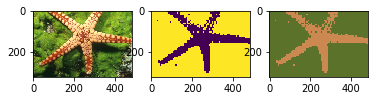

In [66]:
def distance(x,mju):
    return np.sum(np.power((x-mju),2))

def init_centroid(x,k):#when implement use x.T
    n,dim=x.shape
    centroid=np.zeros((k,dim))
    for i in range(k):
        index=int(np.random.uniform(0,n))
        centroid[i,:]=x[index,:]
    return centroid

def kmeans(x,k):
    x=x.T
    n=x.shape[0]
    cluster=np.zeros((n,2))
    cluster_change=True
    
    #init centriod
    centroid=init_centroid(x,k)
    
    while cluster_change:
        cluster_change=False
        for i in range(n):
            mindist=10000000
            minindex=0
            #find the closet point
            for j in range(k):
                dist=distance(centroid[j,:],x[i,:])
                if dist<mindist:
                    mindist=dist
                    minindex=j
                    
                #update its cluster
            if cluster[i,0]!=minindex:
                cluster_change=True
                cluster[i,:]=minindex,np.power(mindist,2)
            #update centroid        
        for j in range(k):
            point=x[np.nonzero(cluster[:,0]==j)[0]]
            if len(point)!=0:
                centroid[j,:]=np.mean(point,axis=0)#new_cents[cent_i, :] = np.mean(k_cluster, 0)  
    return centroid,cluster

def test_k_means():
    img = Image.open('images/12003.jpg')
    plt.subplot(1,3,1)
    plt.imshow(img)
    # extract features from image (step size = 7)
    X, L = getfeatures(img, 7)
    num_data=X.shape[1]
    print X.shape[1]
    dim = X.shape[0]
    num_class = 2
    init_mean = np.ndarray((dim, num_class))
    X[dim//2 :, :] = X[dim//2 :, :] * 0.001
    C,Z = kmeans(X,2)
    Y=np.zeros(num_data)
    for i in range(num_data):
        Y[i]=np.argmax(Z[i,:])+1
    # make segmentation image from labels
    print Y
    segm=labels2seg(Y, L)
    plt.subplot(1,3,2)
    plt.imshow(segm)

    # color the segmentation image
    csegm=colorsegms(segm, img)
    plt.subplot(1,3,3)
    plt.imshow(csegm)
    plt.show()


test_k_means()
  


(4, 3060)


/Users/zhiyuzhang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/zhiyuzhang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less


ValueError: array must not contain infs or NaNs

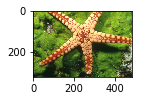

In [67]:
from scipy.stats import multivariate_normal


def Estep(X,prior,mu,sigma):
    D,N=X.shape
    K=len(prior)
    Z=np.zeros((N,K))
    for i in range(0,N):
        Z_sum=0
        for k in range(0, K):
            Z_temp=multivariate_normal.pdf(X[:, i], mu[k,:], sigma[k,:,:])
            Z_sum+=prior[k]*Z_temp
        for k in range(0,K):
            Z[i, k]=prior[k]*multivariate_normal.pdf(X[:, i], mu[k,:], sigma[k,:,:]) / Z_sum
    return Z
def Mstep(X,Z,K):
    D,N=X.shape
    mu=np.zeros((K,D))
    sigma=np.zeros((K,D,D))
    prior=np.zeros(K)
    for k in range(0,K):
        N_k = np.sum(Z,0)[k]
        for i in range(0,N):
            mu[k]+=Z[i,k]*X[:,i]
        mu[k]/= N_k
        for i in range(0, N):
            sigma[k]+=Z[i,k]*np.dot((X[:,i] - mu[k]).reshape(D,1), (X[:,i] - mu[k]).reshape(1,D))
            #need reshape that is where I made mistake
        sigma[k]/=N_k
        prior[k]=N_k/N
    return mu, sigma, prior  
def EM(X,K):
    D, N=X.shape
    mu=np.random.randn(K, D)
    sigma=np.zeros((K, D, D))
    for i in range(K):
        sigma[i]=np.eye(D)
    prior = np.ones(K) / K
    while (True):
        temp_sigma=sigma.copy()
        Z = Estep(X, prior, mu, sigma)
        mu, sigma, prior = Mstep(X, Z,K)
        if (abs(sigma-temp_sigma)<1e-7).all():
            break
    cluster=np.zeros((1,N))
    for i in range(N):
        minem=0
        for j in range(K):
            if(Z[i][j]>minem):
                cluster[0][i]=j
                minem=Z[i][j]
    return cluster
def test_EM():
    img = Image.open('images/12003.jpg')
    plt.subplot(1,3,1)
    plt.imshow(img)
    # extract features from image (step size = 7)
    X, L = getfeatures(img, 7)
    print X.shape

    num_data=X.shape[1]
    dim = X.shape[0]
    num_class = 2
    
    Z = EM(X, K=2)
    print Z
    Y=np.zeros(num_data)
    for i in range(num_data):
        Y[i]=np.argmax(Z[i,:])+1

    # make segmentation image from labels
    segm=labels2seg(Y, L)
    plt.subplot(1,3,2)
    plt.imshow(segm)

    # color the segmentation image
    csegm=colorsegms(segm, img)
    plt.subplot(1,3,3)
    plt.imshow(csegm)
    plt.show()

test_EM()



(4, 3060)
(3060,)


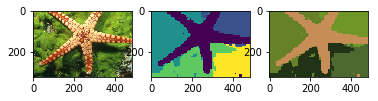

In [85]:
from sklearn import mixture
def test_EM_library():
    img = Image.open('images/12003.jpg')
    plt.subplot(1,3,1)
    plt.imshow(img)
    # extract features from image (step size = 7)
    X, L = getfeatures(img, 7)
    print X.shape

    gmm=mixture.GaussianMixture(n_components=5,covariance_type='full').fit(X.T)
    gmmres=gmm.predict(X.T)
    Z=gmmres
    cluster=np.zeros((1,3060))
    print gmmres.shape
    Y=np.zeros(3060)
    for i in range(3060):
        Y[i]=Z[i]+1

    # make segmentation image from labels
    segm=labels2seg(Y, L)
    plt.subplot(1,3,2)
    plt.imshow(segm)

    # color the segmentation image
    csegm=colorsegms(segm, img)
    plt.subplot(1,3,3)
    plt.imshow(csegm)
    plt.show()
    
test_EM_library()


3060
[2. 2. 2. ... 2. 2. 2.]


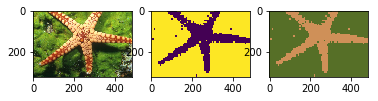

In [91]:
'''u, v, cy, cx'''
def distance(x,mju,lamb):
    temp1=np.sum(np.power(np.hstack((x[0],x[1]))-np.hstack((mju[0],mju[1])),2))
    temp2=np.sum(np.power(np.hstack((x[3],x[2]))-np.hstack((mju[3],mju[2])),2))
    res=temp1+lamb*temp2
    return res
def init_centroid(x,k):#when implement use x.T
    n,dim=x.shape
    centroid=np.zeros((k,dim))
    for i in range(k):
        index=int(np.random.uniform(0,n))
        centroid[i,:]=x[index,:]
    return centroid

def kmeans(x,k,lamb):
    x=x.T
    n=x.shape[0]
    cluster=np.zeros((n,2))
    cluster_change=True
    
    #init centriod
    centroid=init_centroid(x,k)
    
    while cluster_change:
        cluster_change=False
        for i in range(n):
            mindist=10000000
            minindex=0
            #find the closet point
            for j in range(k):
                dist=distance(centroid[j,:],x[i,:],lamb)
                if dist<mindist:
                    mindist=dist
                    minindex=j
                    
                #update its cluster
            if cluster[i,0]!=minindex:
                cluster_change=True
                cluster[i,:]=minindex,np.power(mindist,2)
            #update centroid        
        for j in range(k):
            point=x[np.nonzero(cluster[:,0]==j)[0]]
            if len(point)!=0:
                centroid[j,:]=np.mean(point,axis=0)#new_cents[cent_i, :] = np.mean(k_cluster, 0)  
    return centroid,cluster

def test_k_means():
    img = Image.open('images/12003.jpg')
    plt.subplot(1,3,1)
    plt.imshow(img)
    # extract features from image (step size = 7)
    X, L = getfeatures(img, 7)
    num_data=X.shape[1]
    print X.shape[1]
    dim = X.shape[0]
    num_class = 2
    init_mean = np.ndarray((dim, num_class))
    X[dim//2 :, :] = X[dim//2 :, :] * 0.001
    C,Z = kmeans(X,2,4)
    Y=np.zeros(num_data)
    for i in range(num_data):
        Y[i]=np.argmax(Z[i,:])+1
    # make segmentation image from labels
    print Y
    segm=labels2seg(Y, L)
    plt.subplot(1,3,2)
    plt.imshow(segm)

    # color the segmentation image
    csegm=colorsegms(segm, img)
    plt.subplot(1,3,3)
    plt.imshow(csegm)
    plt.show()


test_k_means()